## LGM- VIRTUAL INTERNSHIP PROGRAM: DATA SCIENCE

## BATCH: JULY 2022

## TASK: 3 Stock Market Prediction And Forecasting Using Stacked LSTM

## LEVEL: BEGINNER

## AUTHOR: ANKIT KALAMBHE

### Import the Libraries

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

### Loading Datast

In [5]:
df = pd.read_csv("NSE-TATAGLOBAL.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


### Preview the Dataset

In [6]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [7]:
df.shape

(2035, 8)

In [8]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [10]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

### Max and Min Values

In [11]:
df.max()

Date                    2018-09-28
Open                         327.7
High                        328.75
Low                         321.65
Last                        325.95
Close                       325.75
Total Trade Quantity      29191015
Turnover (Lacs)           55755.08
dtype: object

In [12]:
df.min()

Date                    2010-07-21
Open                          81.1
High                          82.8
Low                           80.0
Last                          81.0
Close                        80.95
Total Trade Quantity         39610
Turnover (Lacs)              37.04
dtype: object

### Checking Null Values

In [13]:
df.isnull()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2030,False,False,False,False,False,False,False,False
2031,False,False,False,False,False,False,False,False
2032,False,False,False,False,False,False,False,False
2033,False,False,False,False,False,False,False,False


### Visualization

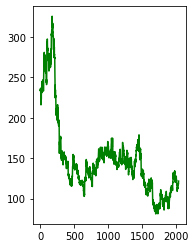

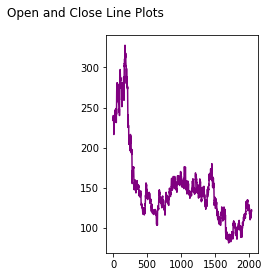

In [53]:
plt.subplot (1,2,1)
plt.plot (df['Close'],color = 'green')
plt.show()

plt.subplot(1,2,2)
plt.plot (df['Open'],color = 'purple')
plt.suptitle ("Open and Close Line Plots")
plt.show()

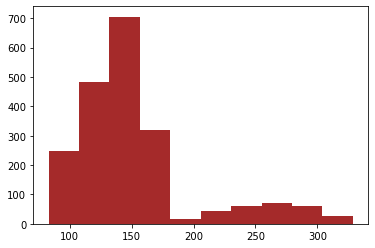

In [54]:
plt.hist (df['High'],color = 'brown')
plt.show()

### To display no. of samples on each class

In [16]:
df_low = df.reset_index()['Low']
df_low

0       230.20
1       231.10
2       232.50
3       232.00
4       230.75
         ...  
2030    112.00
2031    117.10
2032    120.25
2033    120.25
2034    121.05
Name: Low, Length: 2035, dtype: float64

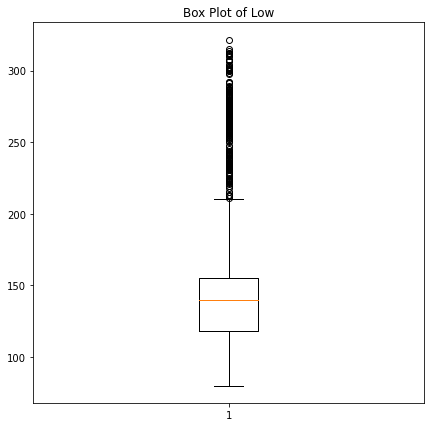

In [17]:
plt.figure (figsize = (7,7))
plt.boxplot (df_low)
plt.title ("Box Plot of Low")
plt.show()

### Here we will use min-max scalar to transform the values from 0 to 1.We should reshape so that we can use fit transform.

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler (feature_range = (0,1))
df_low = scaler.fit_transform (np.array(df_low).reshape(-1,1))

In [19]:
print (df_low)

[[0.62156011]
 [0.6252845 ]
 [0.63107801]
 ...
 [0.16656321]
 [0.16656321]
 [0.16987378]]


### Train and Test Split

In [20]:
training_size=int(len(df_low)*0.65)
test_size=len(df_low)-training_size
train_data,test_data=df_low[0:training_size,:],df_low[training_size:len(df_low),:1]

In [21]:
training_size,test_size

(1322, 713)

In [22]:
train_data

array([[0.62156011],
       [0.6252845 ],
       [0.63107801],
       ...,
       [0.25181047],
       [0.26174219],
       [0.25305193]])

### Data Processing

### convert an array of values into a dataset matrix

In [26]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [27]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

### LSTM

In [29]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### Create the Stacked LSTM model

In [30]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential

In [31]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

### Summary

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 16s 338ms/step - loss: 0.0212 - val_loss: 0.0042
Epoch 2/100
20/20 [==============================] - 5s 241ms/step - loss: 0.0026 - val_loss: 0.0013
Epoch 3/100
20/20 [==============================] - 5s 255ms/step - loss: 0.0021 - val_loss: 0.0010
Epoch 4/100
20/20 [==============================] - 5s 239ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 5/100
20/20 [==============================] - 5s 235ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 6/100
20/20 [==============================] - 5s 244ms/step - loss: 0.0015 - val_loss: 9.3952e-04
Epoch 7/100
20/20 [==============================] - 5s 230ms/step - loss: 0.0013 - val_loss: 9.1298e-04
Epoch 8/100
20/20 [==============================] - 4s 224ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 9/100
20/20 [==============================] - 5s 239ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 10/100
20/20 [==============================] - 5s 239ms/step - loss: 0.0012

20/20 [==============================] - 4s 216ms/step - loss: 3.1185e-04 - val_loss: 2.4512e-04
Epoch 77/100
20/20 [==============================] - 4s 225ms/step - loss: 3.7314e-04 - val_loss: 5.0628e-04
Epoch 78/100
20/20 [==============================] - 5s 232ms/step - loss: 3.6050e-04 - val_loss: 2.5350e-04
Epoch 79/100
20/20 [==============================] - 4s 219ms/step - loss: 3.7072e-04 - val_loss: 3.7741e-04
Epoch 80/100
20/20 [==============================] - 4s 219ms/step - loss: 3.1276e-04 - val_loss: 2.8643e-04
Epoch 81/100
20/20 [==============================] - 5s 228ms/step - loss: 2.8855e-04 - val_loss: 2.5476e-04
Epoch 82/100
20/20 [==============================] - 4s 222ms/step - loss: 2.7645e-04 - val_loss: 2.4238e-04
Epoch 83/100
20/20 [==============================] - 4s 220ms/step - loss: 3.0601e-04 - val_loss: 3.7267e-04
Epoch 84/100
20/20 [==============================] - 4s 221ms/step - loss: 3.2694e-04 - val_loss: 2.1829e-04
Epoch 85/100
20/20 [===

In [34]:
import tensorflow as tf

In [35]:
tf.__version__

'2.9.1'

In [36]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

20/20 [==============================] - 1s 45ms/step


In [37]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

163.40141915930243

In [38]:
math.sqrt(mean_squared_error(ytest,test_predict))

114.11231198586474

### Plotting

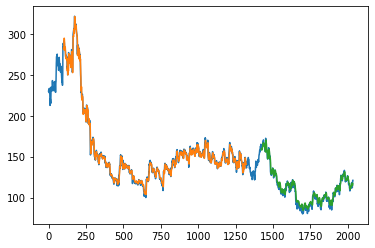

In [39]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df_low)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df_low)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_low)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_low))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### Predicting Stock Price for next 30 days

In [40]:
len(test_data)

713

In [41]:
x_input=test_data[613:].reshape(1,-1)
x_input.shape

(1, 100)

In [42]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [43]:
temp_input

[0.1249741361473205,
 0.13945789364783778,
 0.13904407200496582,
 0.1373887854334782,
 0.13490585557624662,
 0.14214773432650524,
 0.13656114214773435,
 0.12849162011173182,
 0.12456031450444854,
 0.09724808607490171,
 0.11276639768259877,
 0.14959652389819988,
 0.14111318021932545,
 0.1531140078626112,
 0.14525139664804465,
 0.1460790399337885,
 0.1655286571487689,
 0.17835712807779847,
 0.18290916614938968,
 0.19573763707841918,
 0.19449617214980341,
 0.1827022553279537,
 0.18415063107800544,
 0.18704738257810882,
 0.17835712807779847,
 0.18208152286364576,
 0.1843575418994413,
 0.1779433064349265,
 0.16759776536312848,
 0.19573763707841918,
 0.18849575832816057,
 0.19325470722118765,
 0.19966894268570246,
 0.19884129939995865,
 0.20153114007862605,
 0.20070349679288224,
 0.1992551210428306,
 0.1918063314711359,
 0.2002896751500104,
 0.2112559486861163,
 0.21249741361473207,
 0.20691082143596107,
 0.2205669356507346,
 0.21146285950755228,
 0.20546244568590943,
 0.19490999379267537,
 

### Prediction for next 10 days

In [44]:
from numpy import array

lst_output=[]
n_steps=100
nextNumberOfDays=30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[0.16870871]
101
1 day input [0.13945789 0.13904407 0.13738879 0.13490586 0.14214773 0.13656114
 0.12849162 0.12456031 0.09724809 0.1127664  0.14959652 0.14111318
 0.15311401 0.1452514  0.14607904 0.16552866 0.17835713 0.18290917
 0.19573764 0.19449617 0.18270226 0.18415063 0.18704738 0.17835713
 0.18208152 0.18435754 0.17794331 0.16759777 0.19573764 0.18849576
 0.19325471 0.19966894 0.1988413  0.20153114 0.2007035  0.19925512
 0.19180633 0.20028968 0.21125595 0.21249741 0.20691082 0.22056694
 0.21146286 0.20546245 0.19490999 0.17877095 0.17877095 0.17090834
 0.16201117 0.17049452 0.174012   0.17856404 0.17732257 0.16511484
 0.16470101 0.16987378 0.17380509 0.1721498  0.17173598 0.17794331
 0.18001241 0.1874612  0.19325471 0.18663356 0.17421891 0.17711566
 0.17318436 0.17380509 0.1663563  0.14938961 0.15187254 0.15352783
 0.15145872 0.14649286 0.1491827  0.13242293 0.12849162 0.11793917
 0.11628388 0.12290503 0.12725016 0.13490586 0.13345748 0.13242293
 0.13056073 0.13242293 0.13138837

8 day output [[0.17235515]]
9 day input [0.09724809 0.1127664  0.14959652 0.14111318 0.15311401 0.1452514
 0.14607904 0.16552866 0.17835713 0.18290917 0.19573764 0.19449617
 0.18270226 0.18415063 0.18704738 0.17835713 0.18208152 0.18435754
 0.17794331 0.16759777 0.19573764 0.18849576 0.19325471 0.19966894
 0.1988413  0.20153114 0.2007035  0.19925512 0.19180633 0.20028968
 0.21125595 0.21249741 0.20691082 0.22056694 0.21146286 0.20546245
 0.19490999 0.17877095 0.17877095 0.17090834 0.16201117 0.17049452
 0.174012   0.17856404 0.17732257 0.16511484 0.16470101 0.16987378
 0.17380509 0.1721498  0.17173598 0.17794331 0.18001241 0.1874612
 0.19325471 0.18663356 0.17421891 0.17711566 0.17318436 0.17380509
 0.1663563  0.14938961 0.15187254 0.15352783 0.15145872 0.14649286
 0.1491827  0.13242293 0.12849162 0.11793917 0.11628388 0.12290503
 0.12725016 0.13490586 0.13345748 0.13242293 0.13056073 0.13242293
 0.13138837 0.13987172 0.14938961 0.1568384  0.15145872 0.14318229
 0.13449203 0.15394165 0

 0.17327954 0.17363493 0.17401521 0.17441046]
17 day output [[0.17481361]]
18 day input [0.18290917 0.19573764 0.19449617 0.18270226 0.18415063 0.18704738
 0.17835713 0.18208152 0.18435754 0.17794331 0.16759777 0.19573764
 0.18849576 0.19325471 0.19966894 0.1988413  0.20153114 0.2007035
 0.19925512 0.19180633 0.20028968 0.21125595 0.21249741 0.20691082
 0.22056694 0.21146286 0.20546245 0.19490999 0.17877095 0.17877095
 0.17090834 0.16201117 0.17049452 0.174012   0.17856404 0.17732257
 0.16511484 0.16470101 0.16987378 0.17380509 0.1721498  0.17173598
 0.17794331 0.18001241 0.1874612  0.19325471 0.18663356 0.17421891
 0.17711566 0.17318436 0.17380509 0.1663563  0.14938961 0.15187254
 0.15352783 0.15145872 0.14649286 0.1491827  0.13242293 0.12849162
 0.11793917 0.11628388 0.12290503 0.12725016 0.13490586 0.13345748
 0.13242293 0.13056073 0.13242293 0.13138837 0.13987172 0.14938961
 0.1568384  0.15145872 0.14318229 0.13449203 0.15394165 0.13242293
 0.15352783 0.16656321 0.16656321 0.169873

 0.17643961 0.1768436  0.17724584 0.17764576]
25 day output [[0.1780428]]
26 day input [0.18435754 0.17794331 0.16759777 0.19573764 0.18849576 0.19325471
 0.19966894 0.1988413  0.20153114 0.2007035  0.19925512 0.19180633
 0.20028968 0.21125595 0.21249741 0.20691082 0.22056694 0.21146286
 0.20546245 0.19490999 0.17877095 0.17877095 0.17090834 0.16201117
 0.17049452 0.174012   0.17856404 0.17732257 0.16511484 0.16470101
 0.16987378 0.17380509 0.1721498  0.17173598 0.17794331 0.18001241
 0.1874612  0.19325471 0.18663356 0.17421891 0.17711566 0.17318436
 0.17380509 0.1663563  0.14938961 0.15187254 0.15352783 0.15145872
 0.14649286 0.1491827  0.13242293 0.12849162 0.11793917 0.11628388
 0.12290503 0.12725016 0.13490586 0.13345748 0.13242293 0.13056073
 0.13242293 0.13138837 0.13987172 0.14938961 0.1568384  0.15145872
 0.14318229 0.13449203 0.15394165 0.13242293 0.15352783 0.16656321
 0.16656321 0.16987378 0.16870871 0.17149262 0.17252317 0.17283389
 0.17283818 0.17271022 0.17254815 0.172416

In [45]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [46]:
import matplotlib.pyplot as plt

In [47]:
len(df_low)

2035

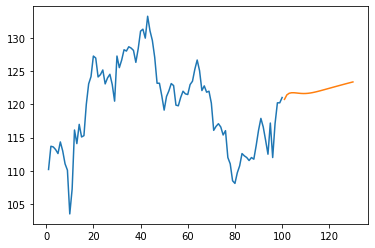

In [48]:
plt.plot(day_new,scaler.inverse_transform(df_low[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.show()

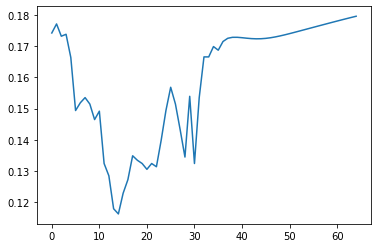

In [49]:
df3=df_low.tolist()
df3.extend(lst_output)
plt.plot(df3[2000:])
plt.show()

In [50]:
df3=scaler.inverse_transform(df3).tolist()

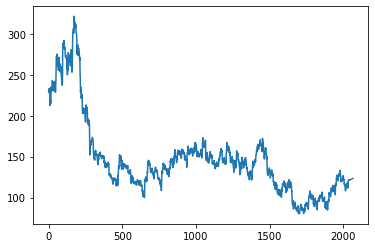

In [51]:
plt.plot(df3)
plt.show()


## -----END-----